# LDSC in gwaslab

In [1]:
import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl

## Loading and filter in only Hapmap3 SNPs

In [2]:
t2d = gl.Sumstats("t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             build="19",
             n="N", verbose=False)

In [3]:
t2d.filter_hapmap3(inplace=True)

2024/02/10 16:52:20 Start to extract HapMap3 SNPs...v3.4.39
2024/02/10 16:52:20  -Current Dataframe shape : 12557761 x 11 ; Memory usage: 909.26 MB
2024/02/10 16:52:20  -Loading Hapmap3 variants from built-in datasets...
2024/02/10 16:52:21  -Since rsID not in sumstats, CHR:POS( build 19) will be used for matching...
2024/02/10 16:52:44  -Checking if alleles are same...
2024/02/10 16:52:46  -Variants with macthed alleles: 1092430
2024/02/10 16:52:47  -Raw input contains 1092430 Hapmap3 variants based on CHR:POS...
2024/02/10 16:52:47 Finished extracting HapMap3 SNPs.


## Heritability estimation

In [4]:
t2d.estimate_h2_by_ldsc(ref_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_ldscores/", 
                               w_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_ldscores/")

2024/02/10 16:52:47 Start to extract HapMap3 SNPs...v3.4.39
2024/02/10 16:52:47  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 116.80 MB
2024/02/10 16:52:47  -Loading Hapmap3 variants from built-in datasets...
2024/02/10 16:52:49 Start to run LD score regression...v3.4.39
2024/02/10 16:52:49  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 116.80 MB
2024/02/10 16:52:49  -Run single variate LD score regression:
2024/02/10 16:52:49   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2024/02/10 16:52:49   -Please cite LDSC: Bulik-Sullivan, et al. LD Score Regression Distinguishes Confounding from Polygenicity in Genome-Wide Association Studies. Nature Genetics, 2015.
2024/02/10 16:52:49  -Arguments:
2024/02/10 16:52:49   -ref_ld_chr:/home/yunye/tools/ldsc/ldscores/eas_ldscores/
2024/02/10 16:52:49   -w_ld_chr:/home/yunye/tools/ldsc/ldscores/eas_ldscores/
2024/02/10 16:52:49  -LDSC log:
2024/02/10 16:52:49   -Reading reference panel LD Score from /home/yunye/t

In [5]:
t2d.ldsc_h2

,h2_obs,h2_se,Lambda_gc,Mean_chi2,Intercept,Intercept_se,Ratio,Ratio_se
0,0.10394433,0.00650644,1.32982693,1.49125406,1.09147712,0.01056279,0.18621142,0.02150169


## Genetic correlation

In [6]:
bmi_female = gl.Sumstats("bbj_bmi_female.txt.gz",fmt="auto",ea="REF",nea="ALT",rsid="SNP",n=70000, sep="\t",build="19",verbose=False)
bmi_male = gl.Sumstats("bbj_bmi_male.txt.gz",fmt="auto",ea="REF",nea="ALT",rsid="SNP",n=80000,sep="\t",build="19",verbose=False)

- other_traits : a list of gl.Sumstats object
- rg : alias for each trait including the main trait

In [7]:
t2d.estimate_rg_by_ldsc(other_traits=[bmi_female,bmi_male], 
                               rg="T2D,BMI_female,BMI_male",
                               ref_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_ldscores/", 
                               w_ld_chr = "/home/yunye/tools/ldsc/ldscores/eas_ldscores/")

2024/02/10 16:53:13 Start to extract HapMap3 SNPs...v3.4.39
2024/02/10 16:53:13  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 116.80 MB
2024/02/10 16:53:13  -Loading Hapmap3 variants from built-in datasets...
2024/02/10 16:53:14 Start to run LD score regression for genetic correlation...v3.4.39
2024/02/10 16:53:14  -Current Dataframe shape : 1092430 x 12 ; Memory usage: 116.80 MB
2024/02/10 16:53:14  -Run cross-trait LD score regression:
2024/02/10 16:53:14   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2024/02/10 16:53:14   -Please cite LDSC: Bulik-Sullivan, B., et al. An Atlas of Genetic Correlations across Human Diseases and Traits. Nature Genetics, 2015.
2024/02/10 16:53:14  -Arguments:
2024/02/10 16:53:14   -rg:T2D,BMI_female,BMI_male
2024/02/10 16:53:14   -ref_ld_chr:/home/yunye/tools/ldsc/ldscores/eas_ldscores/
2024/02/10 16:53:14   -w_ld_chr:/home/yunye/tools/ldsc/ldscores/eas_ldscores/
2024/02/10 16:53:14  -Processing sumstats with alias BMI_female 

In [8]:
t2d.ldsc_rg

,p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
0,T2D,BMI_female,0.320668,0.062279,5.148882,2.620433e-07,0.193199,0.012133,1.030609,0.010226,0.019184,0.009454
1,T2D,BMI_male,0.209849,0.060088,3.492357,4.787786e-04,0.175952,0.011384,1.047687,0.010717,0.005353,0.011893


2024/02/10 16:53:58 Start to create ldsc genetic correlation heatmap...
2024/02/10 16:53:58 Raw dataset records: 2
2024/02/10 16:53:58  -Raw dataset non-NA records: 2
2024/02/10 16:53:58 Filling diagnal line and duplicated pair for plotting...
2024/02/10 16:53:58 Valid unique trait pairs: 2
2024/02/10 16:53:58  -Valid unique trait1: 1
2024/02/10 16:53:58  -Valid unique trait2: 2
2024/02/10 16:53:58  -Significant correlations with P < 0.05: 2
2024/02/10 16:53:58  -Significant correlations after Bonferroni correction: 2
2024/02/10 16:53:58  -Significant correlations with FDR <0.05: 2
2024/02/10 16:53:58 Plotting heatmap...
2024/02/10 16:53:58 Full cell : fdr-corrected P == 0.05
2024/02/10 16:53:58 P value annotation text (Order: Bon -> FDR -> Pnom): 
2024/02/10 16:53:58  -* : non-corrected P < 0.05 
2024/02/10 16:53:58  -** : fdr-corrected P < 0.05 
2024/02/10 16:53:58  -*** : bon-corrected P < 0.05 
2024/02/10 16:53:58 Start to save figure...
2024/02/10 16:53:58  -Skip saving figure!
20

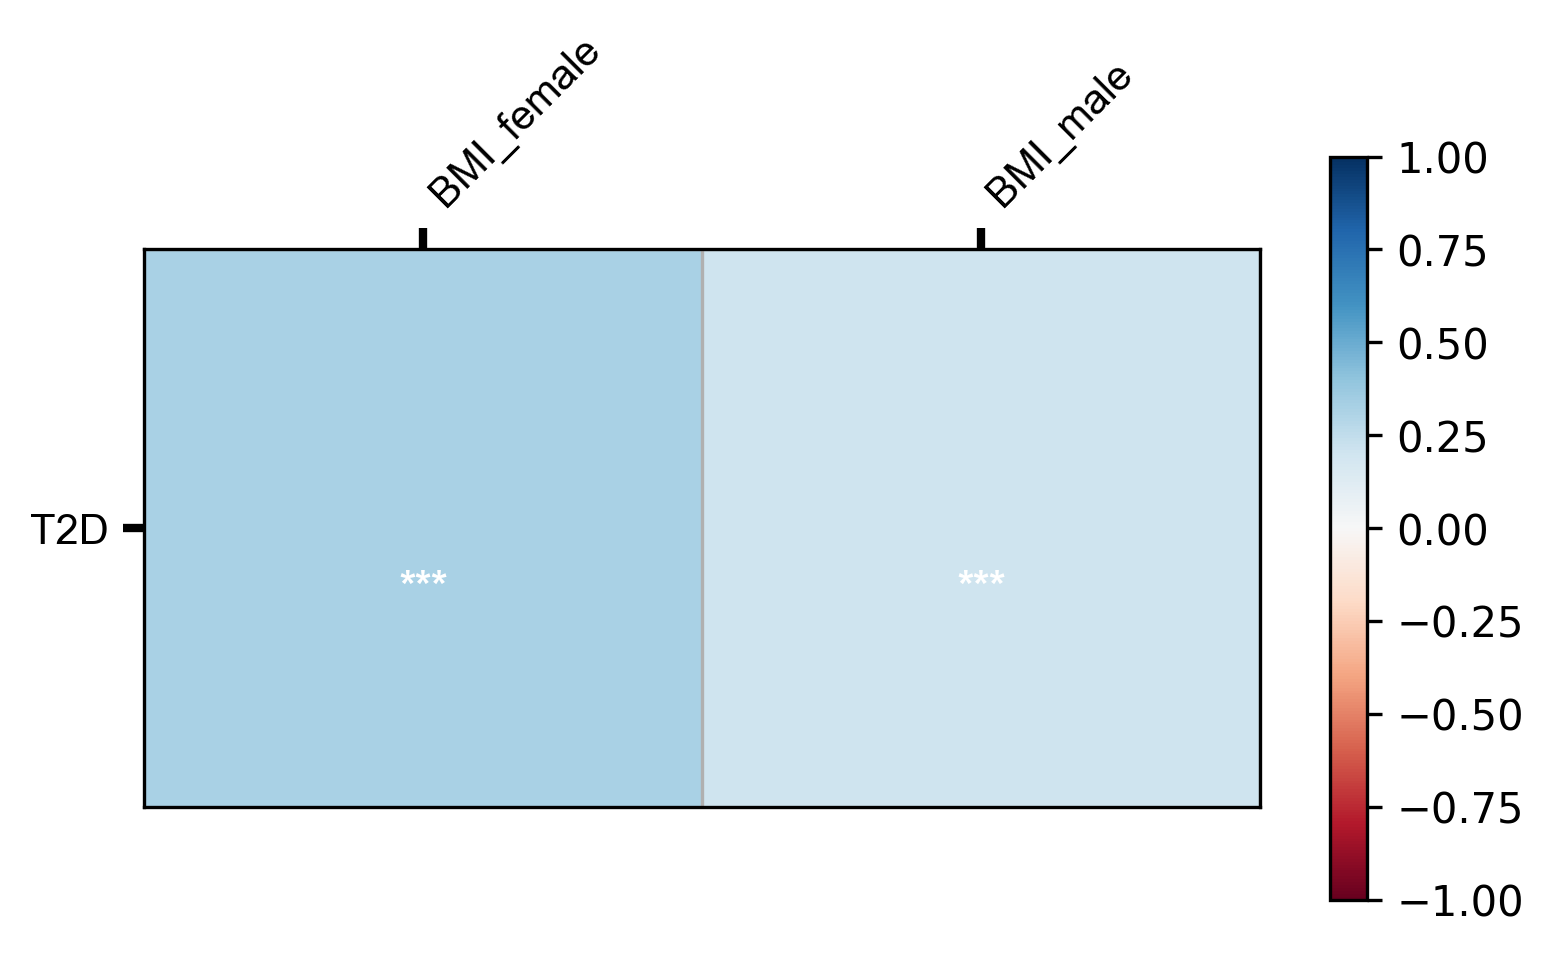

In [10]:
fig,ax,log,df = gl.plot_rg(t2d.ldsc_rg)